We want to determine the Bessel function of arbitrary order $l$ using the following recursion relations

$$j_{l+1}(x) = \frac{2l+1}{x}j_l(x) - j_{l-1}(x),\quad \text{(up)}$$

and

$$j_{l-1}(x) = \frac{2l+1}{x}j_l(x) - j_{l+1}(x),\quad \text{(down)}$$

knowing that,

$$j_0(x) = \frac{\sin x}{x}$$

and

$$j_1(x) = \frac{\sin x}{x^2} - \frac{\cos x}{x}$$



In [1]:
import numpy as np
from math import sin, cos

In [31]:
def up_bessel(x,order = 0, array = False):
    # This one is easier, because we already know the expression for j_0 and j_1

    j = np.zeros(order+1, dtype=np.float64)
    
    if order >= 0:
        j[0] = sin(x)/x

    if order >=1:
        j[1] = (sin(x)/(x**2)) - (cos(x)/x)

    if order >=2:
        for i in range(2, order+1):
            j[i] = ((2*(i-1)+1)/x)*j[i-1] - j[i-2]

    if array:
        return j
    else:
        return j[order]

In [51]:
up_bessel(0.1,8, array = False)

-0.03306557849013292

In [35]:
def down_bessel(x,order,start = 50, array = False):
    # initiate j
    j = np.zeros(start+2)

    j[start+1] = j[start] = 1

    for i in range(start-1,-1,-1):
        j[i] = ((2*(i+1)+1)/x)*j[i+1] - j[i+2]

    scale = (sin(x)/x)/j[0]

    j_scaled = j*scale

    if array:
        return j_scaled[0:order+1]
    else:
        return j_scaled[order]
    

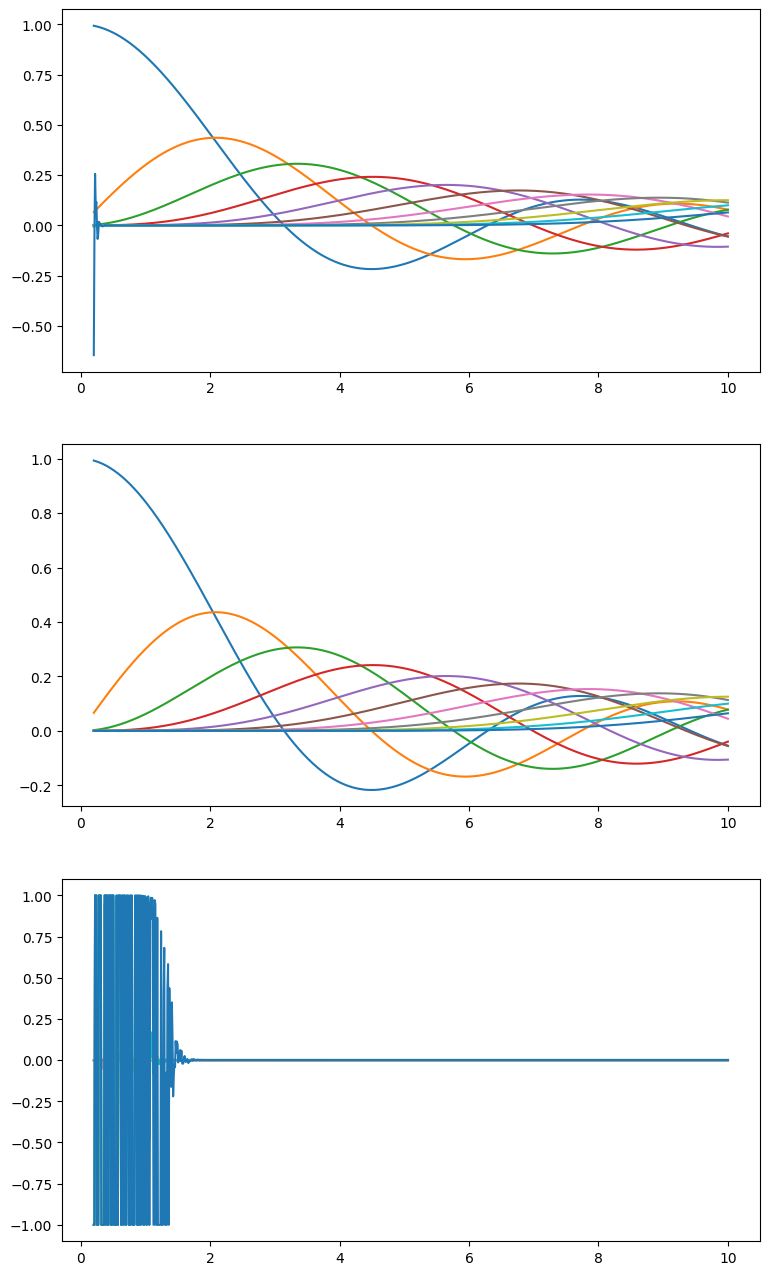

In [53]:
import matplotlib.pyplot as plt

order = 10
x_array = np.linspace(0.2,10,1000)

up_data = np.zeros((order+1,len(x_array)))
down_data = np.zeros((order+1,len(x_array)))

for i,x in enumerate(x_array):
    up_data[:,i] = up_bessel(x, order, array = True)
    down_data[:,i] = down_bessel(x, order, array = True)

fig, axs = plt.subplots(nrows=3, ncols = 1, figsize = (9,16))

datas = [up_data,down_data, (up_data-down_data)/(np.abs(up_data)+np.abs(down_data))]

for i in range(len(axs)):
    for j in range(datas[i].shape[0]):
        axs[i].plot(x_array,datas[i][j,:])
    
